### Project: Automatic classification of tweets_Final

<h1><center>Project </center></h1>
<h1><center>by </center></h1>
<h1><center> Piyush Vyas </center></h1>



In [1]:
#load libraries
import pandas as pd 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords



#pip install plotly
import plotly
from plotly import graph_objs
# plotly configuration
#plotly.offline.init_notebook_mode()
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load test and train data
train = pd.read_csv("yelp.csv")

# Step 1 Descriptive Analysis:


### Train data shape 

In [3]:
train.shape

(359052, 6)

In [4]:

# have look at the train and test data (first five rows)
print("train data first five rows")
train.head(5)


train data first five rows


,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Â...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11/1/2010,Snack is great place for a Â casual sit down l...,-1


In [7]:
train.drop(columns=['User_id', 'Product_id', 'Rating', 'Date'])

,Review,Label
0,The food at snack is a selection of popular Gr...,-1
1,This little place in Soho is wonderful. I had ...,-1
2,ordered lunch for 15 from Snack last Friday. Â...,-1
3,This is a beautiful quaint little restaurant o...,-1
4,Snack is great place for a Â casual sit down l...,-1
...,...,...
359047,"I'm very spoiled with Pizza. Really, I have tr...",1
359048,Can't say enough good things about this place....,1
359049,"Had a great dinner here- fantastic pizza, the ...",1
359050,"Great foods and great drinks, they have even p...",1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
var1 = train.groupby('Label').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
a=var1.style.background_gradient()
a


,Label,Review
1,1,322167
0,-1,36885


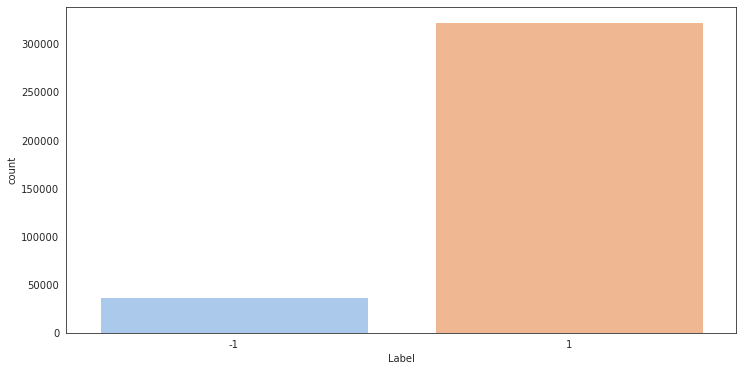

In [9]:
plt.figure(figsize=(12,6))
b=sns.countplot(x='Label',data=train,palette="pastel") #palette = flare or Set3
fig=b.get_figure()
fig.savefig('1.png',dpi=300)

In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


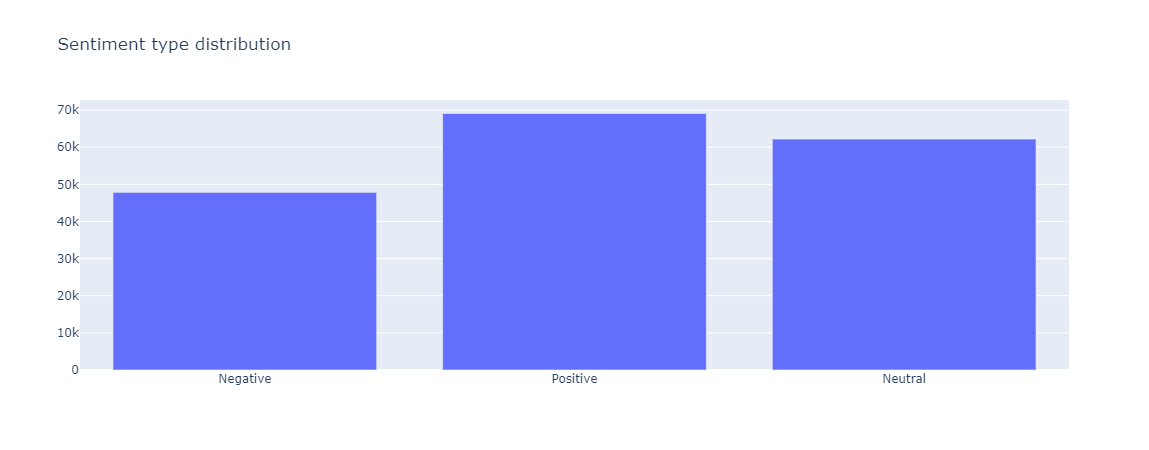

In [43]:
import plotly
from plotly import graph_objs
# let's look at the distribution of labels across the tweets. 1 (positive) or 0 (negative)
pos = len(train[train["Sentiment"] == 0])
neg = len(train[train["Sentiment"] == 2])
neu = len(train[train["Sentiment"] == 1])


dist = [
    graph_objs.Bar(
        x=["Negative","Positive","Neutral"],
        y=[neg, pos,neu],
        
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Sentiment type distribution")})

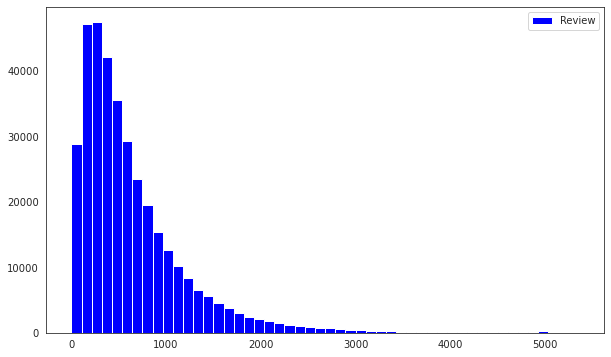

In [12]:

# Let’s view what’s the length of the Tweets in our Train set

len = train['Review'].str.len()
plt.figure(figsize=(10,6))
plt.hist(len, bins=50, label="Review", color = "blue")
plt.legend();
#plt.savefig('2.png',dpi=300)

# Step 2: Data pre-processing


In [14]:
import re
import nltk
nltk.download('wordnet')
import nltk as nlp
description_list = []
for description in train.Review:
    description = re.sub("[^a-zA-Z]"," ",description)#removal of uneccesory words.
    description = description.lower()   # Capitalize letters  to lower case
    description = nlp.word_tokenize(description)#we divide each sentence into words
    lemma = nlp.WordNetLemmatizer() # it helps us find the root of the word.
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description) #we have created a sentence by combining words
    description_list.append(description)
    


 

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
 
max_features= 1000 #get the most used 1000 words.

#Stopwords.
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

#translates sentences into codes of 0 and 1
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  

# Step 3 : Modelbuilding 

In [16]:

y = train.iloc[:,1].values 
x = sparce_matrix

#y.head() : to see the labels of data in y

# X : to see the array of tweets.


In [17]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
y

array([  0,   0,   0, ..., 349, 349, 349])

In [19]:
x.shape

(359052, 1000)

In [20]:
y.shape

(359052,)

In [21]:
# converted all data into array so that we can perform further measures
import numpy as np             
x_final=np.array(x)
y_final=np.array(y)

In [22]:
# data split into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final,y_final, test_size = 0.30, random_state = 42)

In [25]:
#Navie Bayes Classification Algorithm
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(x_train,y_train)
#Test
y_pred=nb.predict(x_test)
print("Navie Bayes algorithm accuracy:",
      nb.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test,nb.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
c=sns.heatmap(cm_nb,annot=True,linewidths=0.5,
            linecolor="red",fmt=".0f",ax=ax)

fig=c.get_figure()
#fig.savefig('2.png',dpi=300)

MemoryError: Unable to allocate 1.87 GiB for an array with shape (251336, 1000) and data type float64

In [ ]:
#KNN Classification Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Knn algorithm accuracy=",knn.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,knn.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)


Random Forest algorithm accuracy = 93.03368443007612
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.63      0.25      0.36       684

    accuracy                           0.94      9589
   macro avg       0.79      0.62      0.66      9589
weighted avg       0.92      0.94      0.92      9589



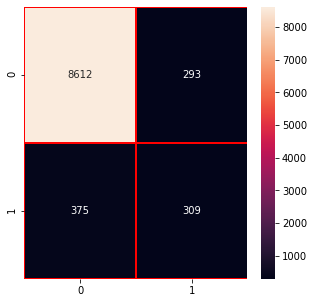

In [27]:
#Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
print("Random Forest algorithm accuracy =",rf.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,rf.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

Decision Tree algorithm accuracy= 90.62467410574617
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8905
           1       0.37      0.46      0.41       684

    accuracy                           0.91      9589
   macro avg       0.67      0.70      0.68      9589
weighted avg       0.92      0.91      0.91      9589



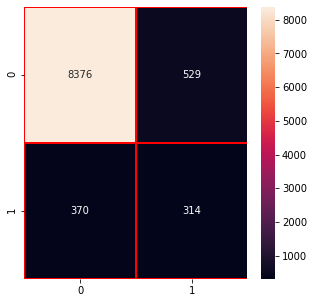

In [28]:
#Decision Tree Classification Algorithm
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Decision Tree algorithm accuracy=",dt.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,dt.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

Logistic Regression algorithm accuracy = 94.43111899050996
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8905
           1       0.37      0.46      0.41       684

    accuracy                           0.91      9589
   macro avg       0.67      0.70      0.68      9589
weighted avg       0.92      0.91      0.91      9589



C:\Users\DSU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



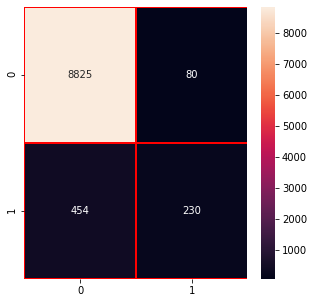

In [29]:
#Logistic Regression Classification Algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression algorithm accuracy =",lr.score(x_test,y_test)*100)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #, target_names=target_names))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,lr.predict(x_test))
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_lr,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)

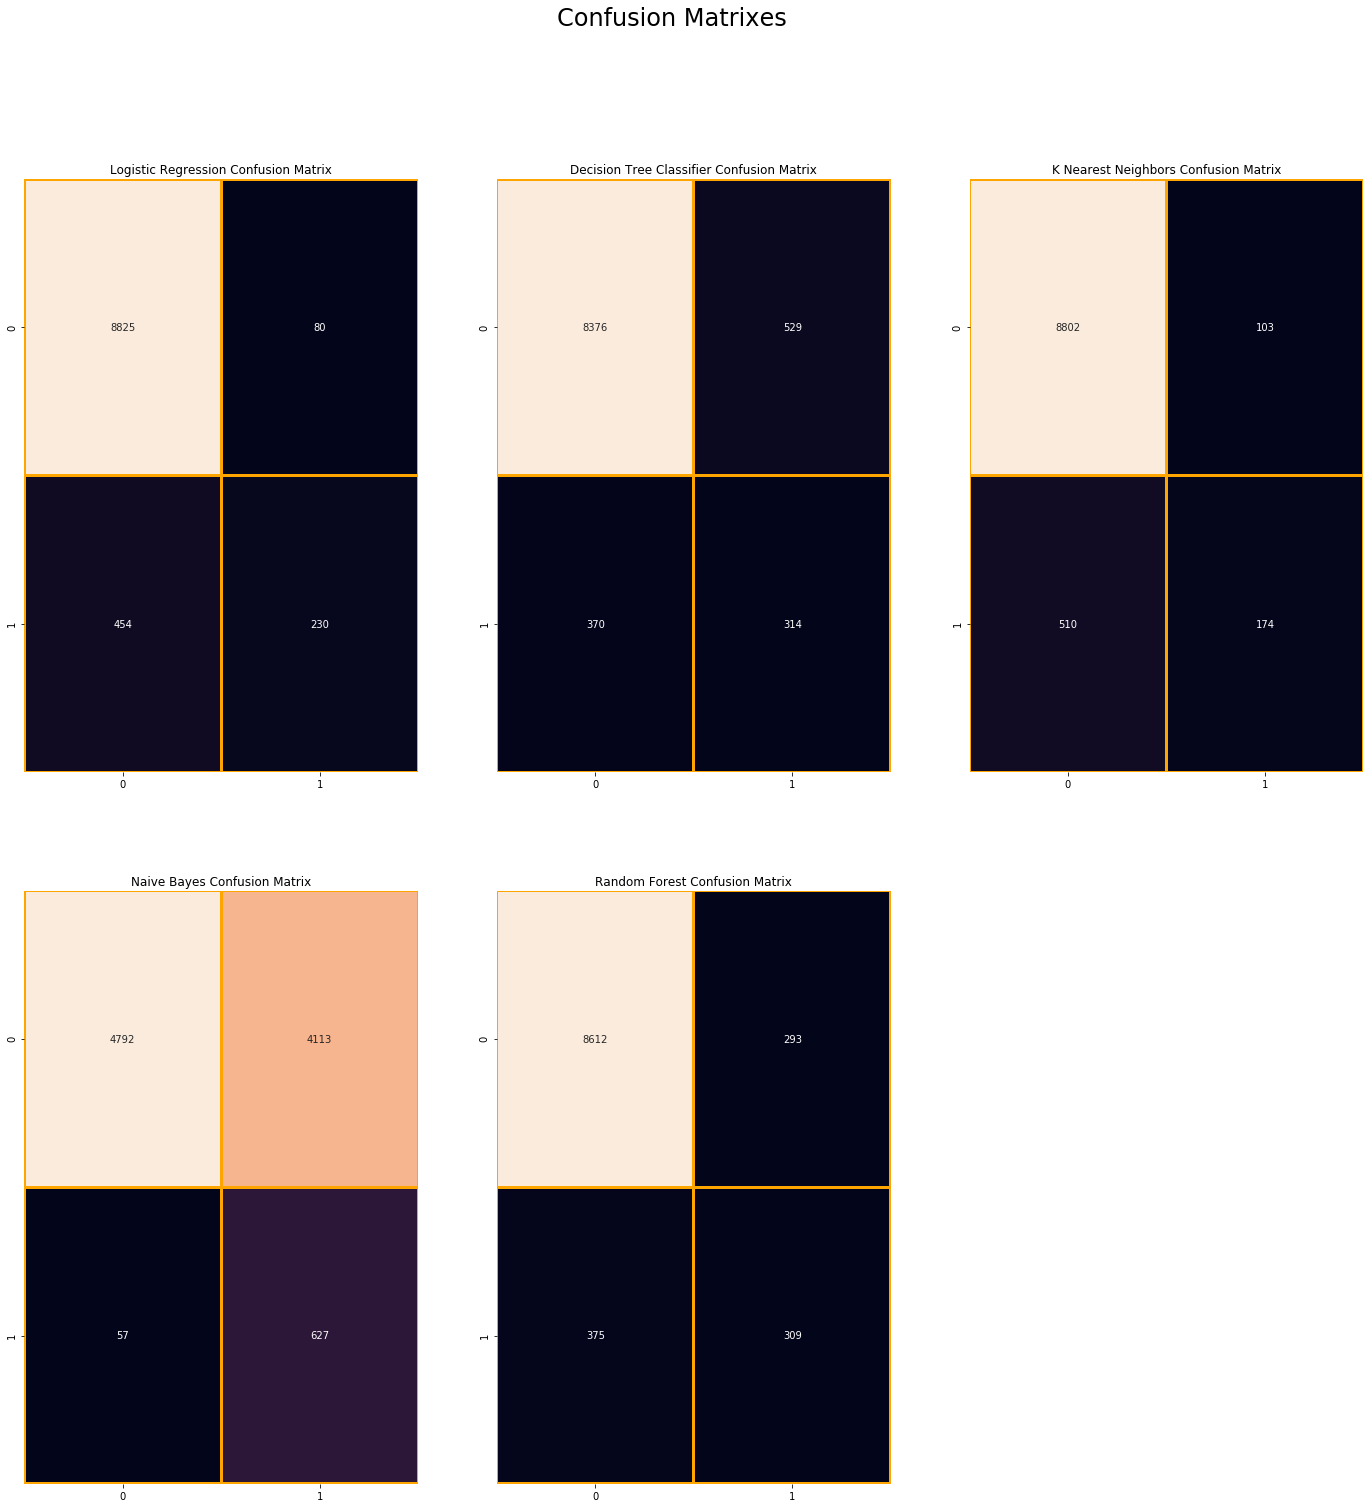

In [31]:
plt.figure(figsize=(24,24))
plt.suptitle("Confusion Matrixes",fontsize=24)
#Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Decision Tree Confusion Matrix
plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#K Nearest Neighbors Confusion Matrix
plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")
#Random Forest Confusion Matrix
plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,linewidths=2,linecolor="orange",fmt=".0f")